## Libraries comparison analysis

In [159]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")
%matplotlib inline

In [160]:
benchmark_pandas = '/Users/adolfomytr/Documents/Data Science/Polars/pandas-vs-polars/benchmark_results/benchmark_pandas.csv'
benchmark_polars_eager = '/Users/adolfomytr/Documents/Data Science/Polars/pandas-vs-polars/benchmark_results/benchmark_polars_eager.csv'
benchmark_polars_lazy = '/Users/adolfomytr/Documents/Data Science/Polars/pandas-vs-polars/benchmark_results/benchmark_polars_lazy.csv'

Load benchmark files and combine them into a single file

In [161]:
# Load individual benchmark CSVs
pandas_df = pd.read_csv(benchmark_pandas)
polars_eager_df = pd.read_csv(benchmark_polars_eager)
polars_lazy_df = pd.read_csv(benchmark_polars_lazy)

# Combine into one DataFrame
benchmark_df = pd.concat([pandas_df, polars_eager_df, polars_lazy_df], ignore_index=True)
benchmark_df["Step"] = benchmark_df["Step"].str.strip()  # normalize step names

benchmark_df = benchmark_df.reset_index()
benchmark_df.head()

,index,Library,Step,Time (s),Peak Memory (MB)
0,0,Pandas,Load CSV,156.1482,6036.6156
1,1,Pandas,Describe numeric columns,1.9719,366.7309
2,2,Pandas,Merchant type value counts,0.7308,14.9697
3,3,Pandas,Missing values per column,14.0371,538.8379
4,4,Pandas,Min txn_date,0.0600,67.4210


Prepare comparison table

In [162]:
# Pivot for step-by-step comparison
pivot_df = benchmark_df.pivot(index="Step", columns="Library", values=["Time (s)", "Peak Memory (MB)"])
pivot_df.columns = ["_".join(col).strip() for col in pivot_df.columns.values]
pivot_df = pivot_df.reset_index()

# Compute eager % improvements (vs Pandas)
pivot_df["Time Improvement Eager vs Pandas (%)"] = 100 * (
    pivot_df["Time (s)_Pandas"] - pivot_df["Time (s)_Polars Eager"]
) / pivot_df["Time (s)_Pandas"]

pivot_df["Memory Improvement Eager vs Pandas (%)"] = 100 * (
    pivot_df["Peak Memory (MB)_Pandas"] - pivot_df["Peak Memory (MB)_Polars Eager"]
) / pivot_df["Peak Memory (MB)_Pandas"]

# Compute lazy % improvements (vs Pandas)
pivot_df["Time Improvement Lazy vs Pandas (%)"] = 100 * (
    pivot_df["Time (s)_Pandas"] - pivot_df["Time (s)_Polars Lazy"]
) / pivot_df["Time (s)_Pandas"]

pivot_df["Memory Improvement Lazy vs Pandas (%)"] = 100 * (
    pivot_df["Peak Memory (MB)_Pandas"] - pivot_df["Peak Memory (MB)_Polars Lazy"]
) / pivot_df["Peak Memory (MB)_Pandas"]

pivot_df.head()

,Step,Time (s)_Pandas,Time (s)_Polars Eager,Time (s)_Polars Lazy,Peak Memory (MB)_Pandas,Peak Memory (MB)_Polars Eager,Peak Memory (MB)_Polars Lazy,Time Improvement Eager vs Pandas (%),Memory Improvement Eager vs Pandas (%),Time Improvement Lazy vs Pandas (%),Memory Improvement Lazy vs Pandas (%)
0,Avg/Total txn by merch type,0.4500,0.3571,0.1332,119.7487,0.0038,0.0023,20.644444,99.996827,70.400000,99.998079
1,Daily transaction count,0.3781,7.0903,0.0962,187.1024,0.0068,0.0025,-1775.244644,99.996366,74.556996,99.998664
2,Describe numeric columns,1.9719,1.3710,1.3746,366.7309,0.2920,0.1067,30.473148,99.920378,30.290583,99.970905
3,Fraud amount stats,4.1641,0.2850,0.7072,336.4072,0.0139,0.0098,93.155784,99.995868,83.016738,99.997087
4,Fraud rate by merchant_type,0.4032,0.1447,0.1279,179.6154,0.0028,0.0018,64.112103,99.998441,68.278770,99.998998


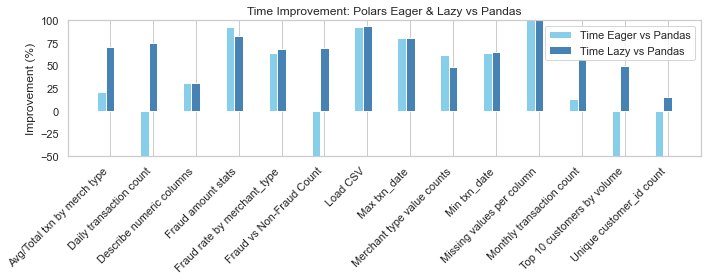

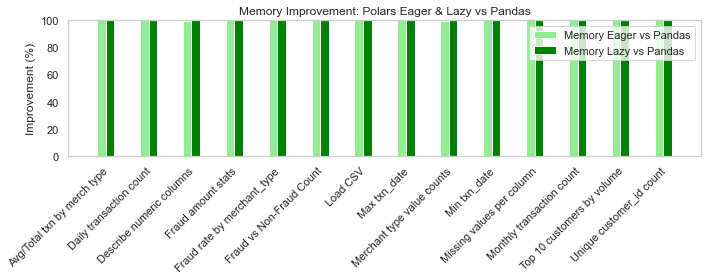

In [163]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare plot data
steps = pivot_df["Step"]
x = np.arange(len(steps))  # X positions

bar_width = 0.2

# Extract data
eager_time = pivot_df["Time Improvement Eager vs Pandas (%)"]
lazy_time = pivot_df["Time Improvement Lazy vs Pandas (%)"]
eager_memory = pivot_df["Memory Improvement Eager vs Pandas (%)"]
lazy_memory = pivot_df["Memory Improvement Lazy vs Pandas (%)"]

# Plot Time Improvements
plt.figure(figsize=(10, 4))
plt.bar(x - bar_width, eager_time, width=bar_width, label="Time Eager vs Pandas", color="skyblue")
plt.bar(x, lazy_time, width=bar_width, label="Time Lazy vs Pandas", color="steelblue")
plt.xticks(x, steps, rotation=45, ha='right')
plt.ylim(-50, 100)
plt.ylabel("Improvement (%)")
plt.title("Time Improvement: Polars Eager & Lazy vs Pandas")
plt.legend()
plt.tight_layout()
plt.grid(axis="y")
plt.show()

# Plot Memory Improvements
plt.figure(figsize=(10, 4))
plt.bar(x - bar_width, eager_memory, width=bar_width, label="Memory Eager vs Pandas", color="lightgreen")
plt.bar(x, lazy_memory, width=bar_width, label="Memory Lazy vs Pandas", color="green")
plt.xticks(x, steps, rotation=45, ha='right')
plt.ylim(0, 100)
plt.ylabel("Improvement (%)")
plt.title("Memory Improvement: Polars Eager & Lazy vs Pandas")
plt.legend()
plt.tight_layout()
plt.grid(axis="y")
plt.show()

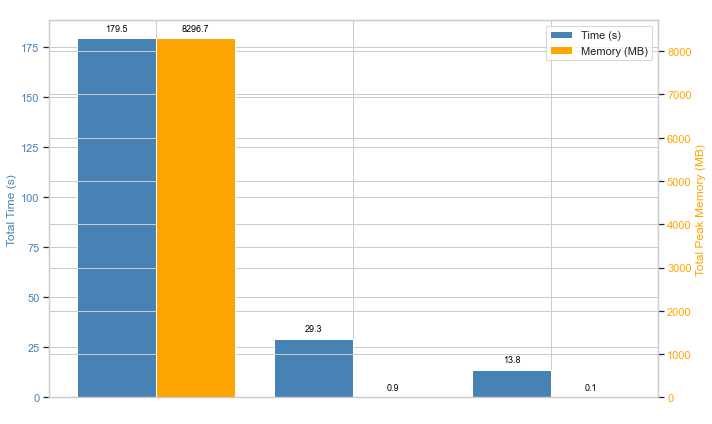

In [164]:
summary = benchmark_df.groupby("Library")[["Time (s)", "Peak Memory (MB)"]].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))
x = np.arange(len(summary))
bar_width = 0.4

# Plot Time bars (left y-axis)
color_time = "steelblue"
time_bars = ax1.bar(x - bar_width/2, summary["Time (s)"], width=bar_width, label="Time (s)", color=color_time)
ax1.set_ylabel("Total Time (s)", color=color_time)
ax1.tick_params(axis="y", labelcolor=color_time)
ax1.set_xticks(x)
ax1.set_xticklabels(summary["Library"], color="white")  # ← X labels white
ax1.set_title("Total Time and Memory Usage per Library", color="white")


# Plot Memory bars (right y-axis)
ax2 = ax1.twinx()
color_mem = "orange"
mem_bars = ax2.bar(x + bar_width/2, summary["Peak Memory (MB)"], width=bar_width, label="Memory (MB)", color=color_mem)
ax2.set_ylabel("Total Peak Memory (MB)", color=color_mem)
ax2.tick_params(axis="y", labelcolor=color_mem)

# Annotate time bars
for bar in time_bars:
    height = bar.get_height()
    ax1.annotate(f"{height:.1f}",
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color="black")

# Annotate memory bars
for bar in mem_bars:
    height = bar.get_height()
    ax2.annotate(f"{height:.1f}",
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, color="black")

# Legend and layout
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
fig.tight_layout()
plt.show()